In [150]:
!pip install pandas

In [151]:
import pandas as pd

In [152]:
data = pd.read_csv('/content/train.csv')

In [153]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
data.insert(value=data.Name.map(lambda name: name.split(',')[1].split('.')[0].strip()), loc=12, column='Title')

In [155]:
title_map={
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Johkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Royalty",
    "Rev": "Officer",
    "The Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}
data["Title"]=data.Title.map(title_map)

In [156]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [157]:
data["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     11
Royalty     10
Name: Title, dtype: int64

In [158]:
data["Title"].isnull().sum()

2

In [159]:
data["Age"].isnull().sum()

177

In [160]:
def passenger_type(row):
  if row["Age"] < 2 :
    return 'Infant'
  elif (row["Age"] >= 2 and row["Age"] < 12) :
    return 'Child'
  elif (row["Age"] >= 12 and row["Age"] < 18) :
    return 'Youth'
  elif (row["Age"] >= 18 and row["Age"] < 65) :
    return 'Adult'
  elif row["Age"] >= 65 :
    return 'Senior'
  elif row["Title"] == 'Master' :
    return 'Child'
  elif row["Title"] == 'Miss' :
    return 'Child'
  elif row["Title"] == 'Mr' or row["Title"] == 'Mrs' :
    return 'Adult'
  else :
    return 'Unknown'

In [161]:
data["PassengerType"]=data.apply(lambda row: passenger_type(row), axis=1)

In [162]:
# del data["PassengerType"]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [163]:
data["PassengerType"].value_counts()

Adult      726
Child       94
Youth       45
Infant      14
Senior      11
Unknown      1
Name: PassengerType, dtype: int64

In [164]:
sex_map={
    "male": 1,
    "female": 0
}
data["Sex"]=data["Sex"].map(sex_map)

In [165]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [166]:
pt_map={
    "Unknown": 0,
    "Infant": 1,
    "Child": 2,
    "Youth": 3,
    "Adult": 4,
    "Senior": 5
}
data["PassengerType"]=data["PassengerType"].map(pt_map)

In [167]:
data.head()
# data["PassengerType"].value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [168]:
data2 = data

**nominal** **starts**

In [169]:
fields = ['Name', 'Sex']
data2 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields, nrows=5)
data2.head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [170]:
nominal = pd.get_dummies(data2['Name'])
nominal

,"Allen, Mr. William Henry","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0


In [171]:
data2B = pd.concat([data2, nominal], axis='columns')
data2B

,Name,Sex,"Allen, Mr. William Henry","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina"
0,"Braund, Mr. Owen Harris",male,0,1,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,0,1,0,0
2,"Heikkinen, Miss. Laina",female,0,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,0,0,1,0
4,"Allen, Mr. William Henry",male,1,0,0,0,0


In [172]:
data2B.drop(columns=["Sex"], inplace=True)
data2B

,Name,"Allen, Mr. William Henry","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina"
0,"Braund, Mr. Owen Harris",0,1,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,0
2,"Heikkinen, Miss. Laina",0,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,0,1,0
4,"Allen, Mr. William Henry",1,0,0,0,0


**ordinal starts**

In [173]:
fields2 = ['Name', 'Age']
data3 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields2, nrows=10)
# data3
data3.insert(value=data3.Name.map(lambda name: name.split(',')[1].split('.')[0].strip()), loc=2, column='Title')
data3["Title"]=data3.Title.map(title_map)
data3["PassengerType"]=data3.apply(lambda row: passenger_type(row), axis=1)
data3

,Name,Age,Title,PassengerType
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult
4,"Allen, Mr. William Henry",35.0,Mr,Adult
5,"Moran, Mr. James",NaN,Mr,Adult
6,"McCarthy, Mr. Timothy J",54.0,Mr,Adult
7,"Palsson, Master. Gosta Leonard",2.0,Master,Child
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs,Adult
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs,Youth


In [174]:
del data3["Age"]
del data3["Title"]
data3

,Name,PassengerType
0,"Braund, Mr. Owen Harris",Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult
2,"Heikkinen, Miss. Laina",Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Adult
4,"Allen, Mr. William Henry",Adult
5,"Moran, Mr. James",Adult
6,"McCarthy, Mr. Timothy J",Adult
7,"Palsson, Master. Gosta Leonard",Child
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Adult
9,"Nasser, Mrs. Nicholas (Adele Achem)",Youth


In [175]:
ordinal = pd.get_dummies(data3['Name'])
# ordinal

In [176]:
data3B = pd.concat([data3, ordinal], axis='columns')

In [178]:
data3B

,Name,PassengerType,"Allen, Mr. William Henry","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard"
0,"Braund, Mr. Owen Harris",Adult,0,1,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,0,0,1,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",Adult,0,0,0,0,1,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Adult,0,0,0,1,0,0,0,0,0,0
4,"Allen, Mr. William Henry",Adult,1,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",Adult,0,0,0,0,0,0,0,1,0,0
6,"McCarthy, Mr. Timothy J",Adult,0,0,0,0,0,0,1,0,0,0
7,"Palsson, Master. Gosta Leonard",Child,0,0,0,0,0,0,0,0,0,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Adult,0,0,0,0,0,1,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",Youth,0,0,0,0,0,0,0,0,1,0


In [179]:
data3B['PassengerType'].replace(pt_map, inplace=True)

In [180]:
data3B

,Name,PassengerType,"Allen, Mr. William Henry","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard"
0,"Braund, Mr. Owen Harris",4,0,1,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,0,0,1,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",4,0,0,0,0,1,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,0,0,0,1,0,0,0,0,0,0
4,"Allen, Mr. William Henry",4,1,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",4,0,0,0,0,0,0,0,1,0,0
6,"McCarthy, Mr. Timothy J",4,0,0,0,0,0,0,1,0,0,0
7,"Palsson, Master. Gosta Leonard",2,0,0,0,0,0,0,0,0,0,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",4,0,0,0,0,0,1,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",3,0,0,0,0,0,0,0,0,1,0


**encoder ends**

In [181]:
import seaborn as sns

In [182]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [183]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.029882
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.174080
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.188228
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.216431
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.382945
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.317768
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.027456
PassengerType,0.029882,-0.174080,-0.188228,0.216431,0.672077,-0.382945,-0.317768,0.027456,1.000000


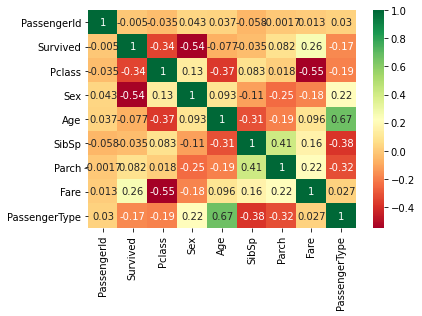

In [184]:
titanic_corr(data)

In [186]:
# data.isnull().sum()
# data.drop(["PassengerId", "Age", "SibSp", "Cabin", "Title"], inplace=True, axis=1)
# data.loc[557,:]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [ ]:
# data = data.drop([100, 200], axis=0)